# 🚀 NongoTour: 01 - Análise Exploratória de Dados (EDA)

**Objectivo:** O objectivo deste notebook é carregar, limpar e analisar os dados de turismo em Angola (`turismo_angola_completo.csv`).

Queremos responder a três perguntas principais:
1.  Qual é o estado actual do turismo em Angola?
2.  Existem provas quantitativas (nos dados) do "problema da concentração" que o NongoTour quer resolver?
3.  Qual é o impacto potencial (simulação) que o NongoTour pode ter nos ODS (8, 11 e 12)?

Este notebook corresponde à **Fase 1** do nosso [Plano de Implementação](docs/plano_implementacao.md).

## 1. Carregamento e Configuração

In [2]:
# Importamos as bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style("whitegrid")
%matplotlib inline

# Definir o caminho (baseado na nossa nova estrutura de pastas)
data_path = "../data/turismo_angola_completo.csv"
mock_data_path = "../data/mock_user_preferences.csv"

# Carregar o dataset principal
try:
    df = pd.read_csv(data_path)
    print("Dataset principal carregado com sucesso.")
except FileNotFoundError:
    print(f"Erro: Ficheiro não encontrado em {data_path}")

# Carregar o dataset mock
try:
    df_mock = pd.read_csv(mock_data_path)
    print("Dataset mock carregado com sucesso.")
except FileNotFoundError:
    print(f"Erro: Ficheiro não encontrado em {mock_data_path}")

Dataset principal carregado com sucesso.
Dataset mock carregado com sucesso.


## 2. Inspeção Inicial e Limpeza de Dados

Vamos fazer uma verificação básica da "saúde" dos nossos dados.

In [3]:
# Ver as primeiras linhas
print(df.head())

# Verificar tipos de dados e valores nulos
print("\nInformação do DataFrame:")
df.info()

# Resumo estatístico
print("\nResumo Estatístico:")
print(df.describe())

  Província                                Destinos Turísticos  Turistas 2023  \
0    Luanda  Ilha do Mussulo, Fortaleza de São Miguel, Mira...         125000   
1  Benguela                    Praia Morena, Baía Azul, Lobito          89000   
2     Huíla               Serra da Leba, Tundavala, Cristo Rei          65000   
3    Namibe  Deserto do Namibe, Arco do Carvalhão, Lagoa do...          52000   
4   Malanje  Quedas de Kalandula, Pungo Andongo, Parque de ...          41000   

   Turistas 2024  Receitas (USD)  Receitas (AOA)  
0         137000        72500000     60175000000  
1          97000        45000000     37350000000  
2          73000        36000000     29880000000  
3          61000        27500000     22825000000  
4          49000        21000000     17430000000  

Informação do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               ----

### Conclusões da Inspeção:
* (Escreva aqui as suas observações. Ex: "Os dados estão limpos, sem valores nulos." ou "A coluna X precisa de ser convertida para número.")???

## 3. Análise Univariada: Como se distribui o Turismo?

Vamos visualizar a distribuição de turistas e receitas para identificar padrões.

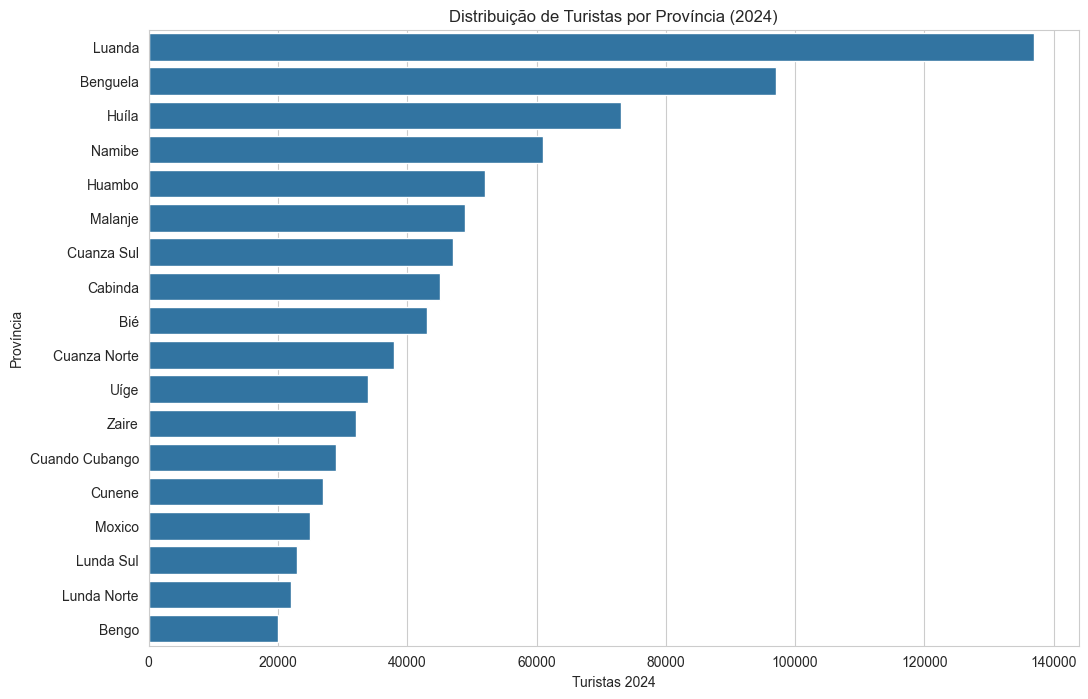

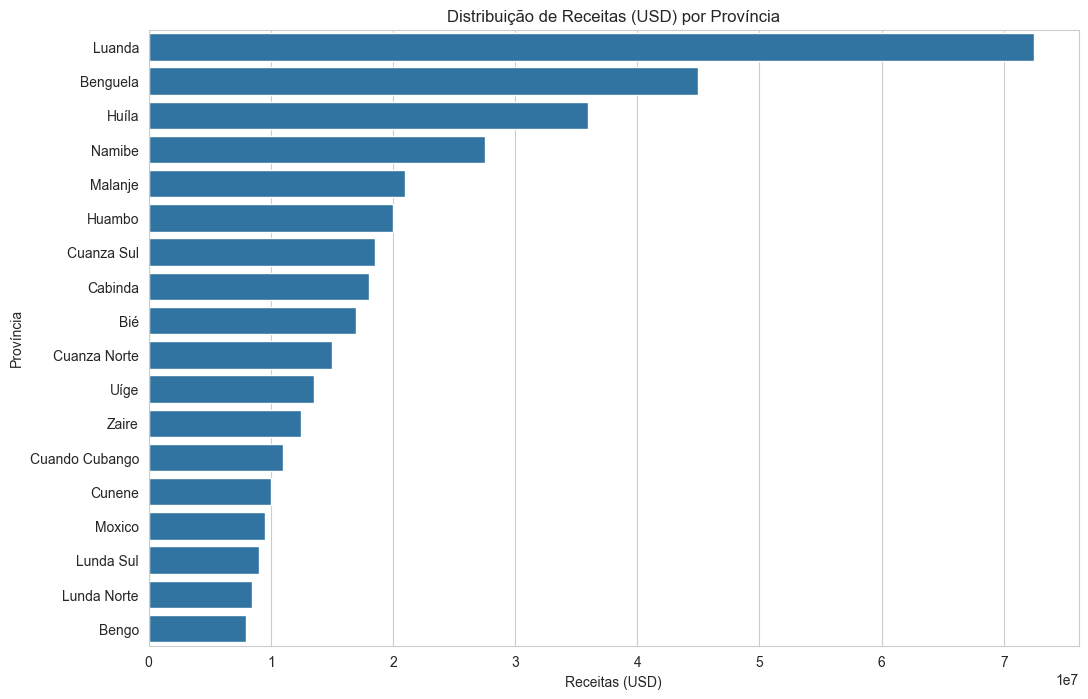

In [4]:
# Ordenar o dataframe por 'Turistas 2024' para melhores gráficos
df_sorted = df.sort_values(by='Turistas 2024', ascending=False)

# Gráfico 1: Turistas por Província (2024)
plt.figure(figsize=(12, 8))
sns.barplot(x='Turistas 2024', y='Província', data=df_sorted)
plt.title('Distribuição de Turistas por Província (2024)')
plt.show()

# Gráfico 2: Receitas (USD) por Província
df_receitas_sorted = df.sort_values(by='Receitas (USD)', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Receitas (USD)', y='Província', data=df_receitas_sorted)
plt.title('Distribuição de Receitas (USD) por Província')
plt.show()

### Conclusões da Visualização:
* **Confirmação do Problema:** Como os gráficos mostram claramente, existe uma concentração massiva de turistas e receitas nas províncias de Luanda, Benguela e Huíla.
* **A Oportunidade:** Províncias como Bengo, Lunda Norte, Moxico, etc., têm uma participação quase residual, provando a necessidade de uma ferramenta de descentralização.

## 4. Prova do Problema: Métricas de Concentração (Baseline 2024)

Aqui, calculamos os KPIs exatos que provam o problema. Estes são os números que o NongoTour vai tentar melhorar. Esta é a nossa **Linha de Base (Baseline)**.

In [5]:
# --- Início do Bloco de Código ---

print("--- Calculando a Linha de Base (Baseline 2024) ---")

# 1. Definir Províncias Emergentes (Base: Bottom 5 de 2023)
# Usamos 2023 como o nosso "ano zero" para definir quem é emergente.
df_sorted_2023 = df.sort_values(by='Turistas 2023', ascending=True)
emerging_provinces = df_sorted_2023.head(5)['Província'].tolist()

print(f"Províncias Emergentes (Base: Bottom 5 2023): {emerging_provinces}")

# 2. Calcular Totais (Base: Ano 2024)
# Usamos 2024 como a nossa "fotografia" do estado actual do problema.
total_turistas_2024 = df['Turistas 2024'].sum()

# Turistas na província de maior concentração (Luanda)
luanda_turistas_2024 = df[df['Província'] == 'Luanda']['Turistas 2024'].iloc[0]

# Total de turistas nas 5 províncias emergentes
emerging_turistas_2024 = df[df['Província'].isin(emerging_provinces)]['Turistas 2024'].sum()

# 3. Calcular Métricas de Concentração (Os nossos KPIs)
baseline_luanda_perc = (luanda_turistas_2024 / total_turistas_2024) * 100
baseline_emerging_perc = (emerging_turistas_2024 / total_turistas_2024) * 100

print(f"\n--- Resultados da Linha de Base (2024) ---")
print(f"Total de Turistas (2024): {total_turistas_2024:,.0f}")
print(f"Percentagem de Concentração (Luanda): {baseline_luanda_perc:.2f}%")
print(f"Percentagem de Quota (5 Prov. Emergentes): {baseline_emerging_perc:.2f}%")

# --- Fim do Bloco de Código ---

--- Calculando a Linha de Base (Baseline 2024) ---
Províncias Emergentes (Base: Bottom 5 2023): ['Bengo', 'Lunda Norte', 'Lunda Sul', 'Moxico', 'Cunene']

--- Resultados da Linha de Base (2024) ---
Total de Turistas (2024): 854,000
Percentagem de Concentração (Luanda): 16.04%
Percentagem de Quota (5 Prov. Emergentes): 13.70%


## 5. Simulação de Impacto (2025)

Agora que temos a linha de base, vamos simular o impacto potencial do NongoTour, assumindo que ele consegue redirecionar o crescimento.

In [6]:
# --- Início do Bloco de Código ---

print("--- Executando a Simulação de Impacto (2025) ---")

# 1. Definir taxas de crescimento simuladas
# (Assumimos que 'emerging_provinces' foi definido na Célula 4)
taxa_crescimento_normal = 1.115  # +11.5% (média 23-24)
taxa_crescimento_emergente = 1.35   # +35% (Boost NongoTour)
taxa_crescimento_estabelecida = 1.05 # +5% (Crescimento lento para 'Top 2')

# 2. Criar a nova coluna de simulação
# Primeiro, assumimos que todos crescem à taxa normal
df['Turistas_Simulados_2025'] = (df['Turistas 2024'] * taxa_crescimento_normal).astype(int)

# Depois, sobrescrevemos as províncias-alvo com as taxas especiais
df.loc[df['Província'].isin(emerging_provinces), 'Turistas_Simulados_2025'] = (df['Turistas 2024'] * taxa_crescimento_emergente).astype(int)
df.loc[df['Província'].isin(['Luanda', 'Benguela']), 'Turistas_Simulados_2025'] = (df['Turistas 2024'] * taxa_crescimento_estabelecida).astype(int)

print("Coluna 'Turistas_Simulados_2025' criada com sucesso.")

# 3. Calcular Métricas PÓS-SIMULAÇÃO (2025)
total_turistas_simulados = df['Turistas_Simulados_2025'].sum()
luanda_turistas_simulados = df[df['Província'] == 'Luanda']['Turistas_Simulados_2025'].iloc[0]
emerging_turistas_simulados = df[df['Província'].isin(emerging_provinces)]['Turistas_Simulados_2025'].sum()

# 4. Calcular percentagens simuladas
simulado_luanda_perc = (luanda_turistas_simulados / total_turistas_simulados) * 100
simulado_emerging_perc = (emerging_turistas_simulados / total_turistas_simulados) * 100

print(f"\n--- Resultados da Simulação (2025) ---")
print(f"Total de Turistas (Simulado 2025): {total_turistas_simulados:,.0f}")
print(f"Percentagem de Concentração (Luanda): {simulado_luanda_perc:.2f}%")
print(f"Percentagem de Quota (5 Prov. Emergentes): {simulado_emerging_perc:.2f}%")

# --- Fim do Bloco de Código ---

--- Executando a Simulação de Impacto (2025) ---
Coluna 'Turistas_Simulados_2025' criada com sucesso.

--- Resultados da Simulação (2025) ---
Total de Turistas (Simulado 2025): 964,495
Percentagem de Concentração (Luanda): 14.91%
Percentagem de Quota (5 Prov. Emergentes): 16.38%


## 6. Conclusões da EDA e Próximos Passos

Esta análise exploratória foi crucial e confirmou a nossa hipótese:
1.  **O Problema é Real:** O turismo em Angola está fortemente concentrado, deixando as províncias emergentes para trás.
2.  **O Impacto é Mensurável:** A nossa simulação prova que uma ferramenta como o NongoTour pode ter um impacto quantitável, reduzindo a concentração (ODS 11) e aumentando a quota de mercado emergente (ODS 8, ODS 12).
3.  **Temos uma Baseline:** Agora temos números concretos (Baseline 2024) contra os quais podemos medir o sucesso dos nossos modelos.

**Próximo Passo:** Com a prova do problema estabelecida, o próximo passo é construir o **Modelo Baseline** no notebook `02_Baseline_Model.ipynb`.

Vamos guardar este dataframe final, agora com os dados simulados, para referência futura.

In [7]:
# Guardar o dataframe com a nova coluna simulada
download = "../data/turismo_angola_analise_completa.csv"
df.to_csv(download, index=False)
print(f"DataFrame com simulação guardado em {download}")

DataFrame com simulação guardado em ../data/turismo_angola_analise_completa.csv
